Osnabr√ºck University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 01: Basic Operations - Convolution

## Introduction

This is the first "real" homework sheet.

The homework sheets will usually be available on Tuesdays before the practice session and are supposed to be solved in groups of three. They have to be handed in before the next practice session in the following week. The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass ùëÅ‚àí2 of the weekly provided exercise sheets.

Sign up for a group on Stud.IP if you have not already done so(See Participants -> Functions/Groups). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something.

Your group will have a group folder in Stud.IP under Documents. Upload your solutions there to hand them in.

This week's sheet should be solved and handed in before **Tuesday, November 9, 2021, 2:00pm**. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Twodimensional Convolution [8 Points]

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works.

Convolution can be described as a mapping of a function onto each pixel of an image, iteratively moving accross the image from pixel to pixel. The function is called a kernel, which is a matrix that defines the weighting of the surrounding pixels and therefore their influence on the resulting new pixel. The larger the size of the kernel, the more surrounding pixels are taken into account.

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Proof your answers.

**Linearity:**\
Convolution is linear as can be easily shown for the box filter. The box filter effectively computes the average of the image patch that it gets as an input. Imagine we have computed a convoluted image *i* with the box filter, then all the pixels in *i* are averages of the image patch around the corresponding pixel in the original image. If we multiply our convoluted image *i* by 2, then all of its pixel values are twice as high. The same is true if we multiply the original image by 2 before performing the convolution because all pixel values that are used in any convolution will be twice as high and so will be the resulting average. That means that ùê∂ùëúùëõùë£ùëúùëôùë¢ùë°ùëñùëúùëõ(2‚ãÖùëñùëöùëéùëîùëí)=2‚ãÖùê∂ùëúùëõùë£ùëúùëôùë¢ùë°ùëñùëúùëõ(ùëñùëöùëéùëîùëí). This satisfies the first condition of proofing the linearity of convolution. The second one is the following: ùê∂ùëúùëõùë£ùëúùëôùë¢ùë°ùëñùëúùëõ(img1 + img2) = ùê∂ùëúùëõùë£ùëúùëôùë¢ùë°ùëñùëúùëõ(img1) + ùê∂ùëúùëõùë£ùëúùëôùë¢ùë°ùëñùëúùëõ(img2). Returning to our box filter, we can see that this is true. Imagine we stack two pictures meaning we add up their pixel values before applying convolution and then take the average of the kernel, we get the same mean as for the case when first taking the individual means and then adding them up for the new image.

**Homogenity:**\
Convolution is homogenous as we apply the same filter kernel in the same way independently of where the i<mage patch is from. Therefore, the output for the convoluted image does not depend on the location of the input image patch in the original image.

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

There are  $k = m*n$  pixels in the image g. The kernel consists of $e=(2m+1)(2n+1)$ elements. Each of the elements has to perform one multiplication. To add all the products together $e-1$ additions are necessary. We assume that the kernel-matrix has already been normalized.
The total amount of necessary additions and multiplications therefore is:
$$k * (e+(e-1))$$
This calculation doesn't include the additions that are neccessary to loop over the pixels.

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results. Assume that the kernel is of size $m \times n$ and the image is of size $M \times N$. Compute the number of operations first for a single pixel and then extend your answer to the whole image. Ignore the normalization of the kernel, i.e. the fraction in front.

Note that here we define the kernel size as $m \times n$ as opposed to Assignment *1c)*. This is a shorter notation.

We can represent a seperable kernel as the outer product of a one dimensional row and a one dimensional column vector. With those two vectors, we can obtain the same convolution as with the matrix by performing convolution with the two successively. Since two vectors have less elements than the matrix, we need to perform less operations/multiplications in order to get our convoluted image. However, not every kernel is separable.

We split the kernel into two vector kernels of the size $m*1$ and $1*n$  respecitvely. First, we iterate through all rows and do the respective vector multiplications and then we do the same with the columns. Therefore we end up with total computation costs of *O(m+n)*, which is noticeably cheaper when comparing it to the *O(m*n)* computations needed in 2c).

## Assignment 2: Applying Convolution [4 Points]

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.filters.convolve` to solve this task. Check the documentation to learn how to use this function. In this assignment you do not have to implement the convolution yourself. Realize the following filters, describe their effect and possible applications.

### a) Box filter

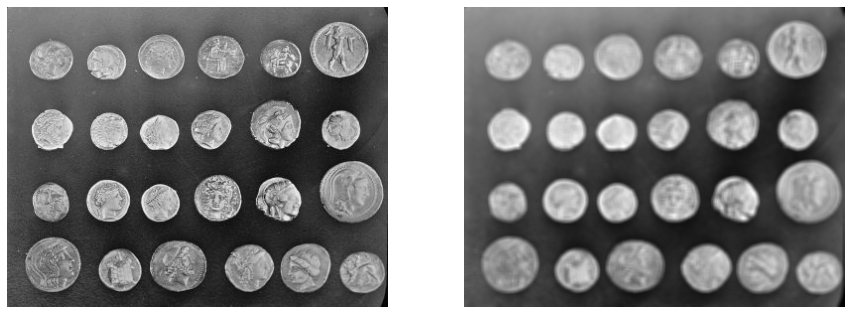

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
from scipy.ndimage.filters import convolve

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

filter_size = 5
box_filtered_image = convolve(image, np.ones((filter_size, filter_size)))


fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(box_filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

**Effects:**\
The new image is blurred and more smooth. The filter effectively removes all sharp features, edges and noise.

**Applications:**\
This technique aids to remove unwanted noise from an image. Also, it can be used to blur the background of a picture (a portrait for example) or for transitions in videos/movies. Generally speaking, it can be deployed to smoothen or average out a dataset that contains a lot of outliers or noise.

### b) Gaussian filter

You may try different filter sizes.

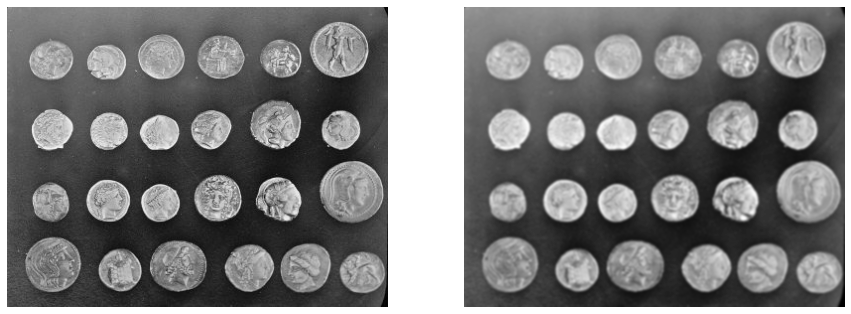

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
from scipy.ndimage.filters import convolve
from scipy.special import binom

# Load an image
image = data.coins().astype(np.float32)

def gaussian_kernel(m):
    # create gaussian kernel of size (2m+1)x(2m+1)
    binom1d = np.array([[binom(2*m, k) for k in range(2*m+1)]])
    return binom1d.T @ binom1d

filter_size = 2
kernel = gaussian_kernel(filter_size)
gaussian_filtered_image = convolve(image, kernel)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(gaussian_filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

**Effects:**\
The Gaussian filter has very similar effects when compared with the box filter, with the difference that the edges are smoother in the case of the Gaussian filter and a little harder in the case of the box filter.

**Applications:**\
Same as above.

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

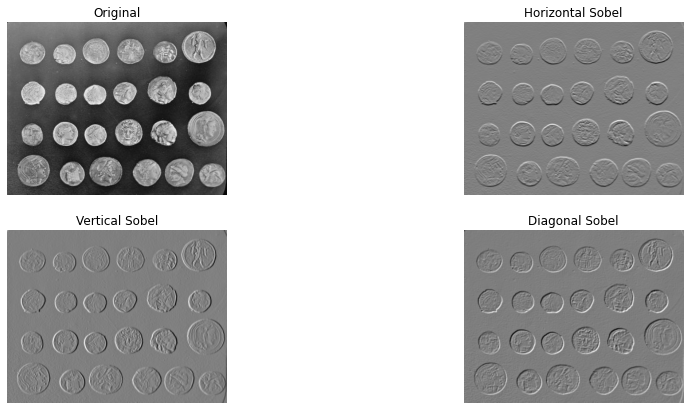

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
from scipy.ndimage.filters import convolve


# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

horizontal_filtered_image = convolve(image, 1/4 * np.asarray([[1,2,1], [0,0,0], [-1,-2,-1]]))
vertical_filtered_image = convolve(image, 1/4 * np.asarray([[1,0,-1], [2,0,-2], [1,0,-1]]))
diagonal_filtered_image = convolve(image, 1/4 * np.asarray([[-2,-1,0], [-1,0,1], [0,1,2]]))

fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1).set_title('Original')
plt.imshow(image, cmap = 'gray')
plt.axis('off')
fig.add_subplot(2,2,2).set_title('Horizontal Sobel')
plt.imshow(horizontal_filtered_image, cmap = 'gray')
plt.axis('off')
fig.add_subplot(2,2,3).set_title('Vertical Sobel')
plt.imshow(vertical_filtered_image, cmap = 'gray')
plt.axis('off')
fig.add_subplot(2,2,4).set_title('Diagonal Sobel')
plt.imshow(diagonal_filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

**Effects & applications:**\
The filter is used to detect edges of an image. It performs gradient measurement and can emphasise on regions of high spatial frequency. It can be employed to identify objects of a given size and shape. When applying Machine Learning, size and shape may even be inferred during the training of the network.

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) \cdot \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$. Use the allready defined gaussian kernel "gauss_5".

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.

* Why is Unsharp Masking sharpening an image?
* What is the difference between normalizing and clipping an image?


#### Answers:
* By inverting the unsharp image borders are extracted. When adding this mask to the original image existing borders are amplified which creates the impression that the image is sharper.
* When clipping, values past some limit(s) are set to this limit. In normalisation however, values are scaled and therefore normalisation doesn't suffer from information loss.

**Effects & applications:**\
Contrary to what the name may suggest, this filter sharpens an image and makes it seem clearer. The filter can be utilised when the original image is blurred. It brings back texture and details in the image and can help improving the contrast locally.

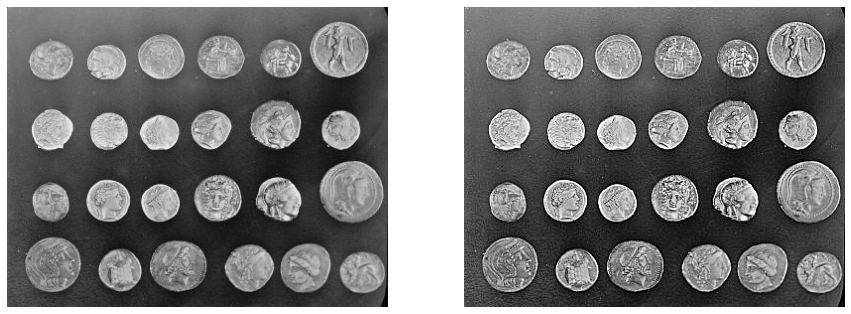

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
from scipy.ndimage.filters import convolve



# Load an image
#image = imread('some_file.png.jpg', mode='F')
image = data.coins().astype(np.float32)

# Define sharpening amount
amount = 1.5

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])

unsharped_mask_image = (image - convolve(image, gauss_5)) * 1.5
sharpened_image = np.clip(image + unsharped_mask_image, 0, 255)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(sharpened_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Assignment 3: Implementing Convolution [8 Points]

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel a argument and return an image of the same size, containing the result of convolving the image with the kernel.

You may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them.

Then apply your function with different kernels. Compare the results with [Assignment 2](#Assignment-2:-Applying-Convolution-[4-Points]).

### Problem at boundries:
The problem at the image boundries is that, pixel information for the kernel is missing. There are several possible solutions. One of them is to simply use a random value for the missing pixels.

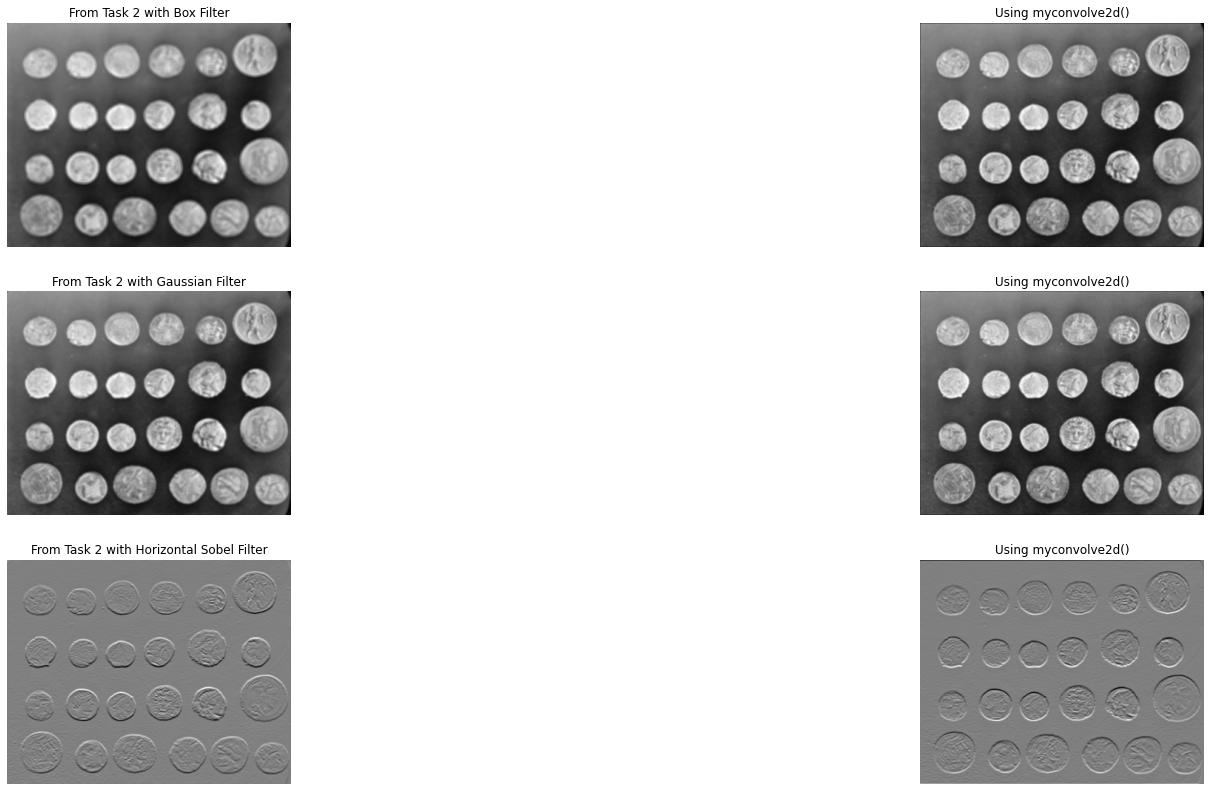

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

def my_convolve2d(img, kern):
    """Convolve an image with a kernel.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kern (np.ndarray): The kernel, also a two-dimensional array.
        
    Returns:
        result (np.ndarray): The convolved image. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    result = np.zeros((M,N))
    
    for row in range(M):
        for column in range(N):
            scalar_product = 0
            for i in range(m):
                for j in range(n):
                    if (0 <= row-int(m/2)+i < M and 0 <= column-int(n/2)+j < N):
                        scalar_product += img[row-int(m/2)+i, column-int(n/2)+j] * kern[i, j]
                        #print("Multiplying img[",row-int(m/2)+i,", ", column-int(n/2)+j, "] with kern[", i, ", ", j, "] which is: ", kern[i,j])
                    else:
                        #print("Multiplying img[",row-int(m/2)+i,", ", column-int(n/2)+j, "] with 0 or kern[", i, ", ", j, "] which is: ", kern[i,j])
                        scalar_product += 0
            result[row, column] = scalar_product
                    

    return result

# Apply your function to an image:
# Try different filters, compare the results with Assignment 2

# Load the image
image = data.coins().astype(np.float32)

box_3 = 1/9 * np.asarray([[1,1,1],[1,1,1],[1,1,1]])
gaussian_3 = 1/16 * np.asarray([[1,2,1],[2,4,2],[1,2,1]])
horizontal_sobel_3 = 1/4 * np.asarray([[1,2,1], [0,0,0], [-1,-2,-1]])
my_box_filtered_image = my_convolve2d(image,box_3)
my_gaussian_filtered_image = my_convolve2d(image, gaussian_3)
my_horizontal_filtered_image = my_convolve2d(image, horizontal_sobel_3)

fig = plt.figure(figsize=(30,14))
a=fig.add_subplot(3,2,1).set_title("From Task 2 with Box Filter")
plt.imshow(box_filtered_image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(3,2,2).set_title("Using myconvolve2d()")
plt.imshow(my_box_filtered_image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(3,2,3).set_title("From Task 2 with Gaussian Filter")
plt.imshow(gaussian_filtered_image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(3,2,4).set_title("Using myconvolve2d()")
plt.imshow(my_gaussian_filtered_image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(3,2,5).set_title("From Task 2 with Horizontal Sobel Filter")
plt.imshow(horizontal_filtered_image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(3,2,6).set_title("Using myconvolve2d()")
plt.imshow(my_horizontal_filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Bonus Assignment: Optical music recognition (OMR)

If you solve this assignment you may leave out one of the other assignments. There will be similar assignments on most of the following sheets.  These bonus assignments are intended to show potential applications of the techniques you learnt in class. They are usually a bit more challenging and often there exist multiple ways to address them. Even if you do not intend to solve them, you may profit from at least taking a look.

**Background:** [Optical music recognition](https://en.wikipedia.org/wiki/Optical_music_recognition) "is a field of research that investigates how to computationally read musical notation in documents. The goal of OMR is to teach the computer to read and interpret sheet music and produce a machine-readable version of the written music score. Once captured digitally, the music can be saved in commonly used file formats, e.g. MIDI (for playback) and MusicXML (for page layout)."

**Data:** The freely available [CVC-MUSCIMA dataset](http://www.cvc.uab.es/cvcmuscima/index_database.html) contains 1000 high-quality images of handwritten music scores, transcribed by 50 different musicians. This dataset has been further extended into the [MUSCIMA++ dataset](https://ufal.mff.cuni.cz/muscima), which contains detailed annotations for 140 out of the 1000 pages. Both datasets are still used for developing and evaluating OMR systems.

**Task:** staff removal. The goal is to remove the staff, that is the horizontal lines on which musical symbols are placed, and to only keep the symbols. That is a common preprocessing step in many OMR approaches. We have provided three examples from the CVC-MUSCIMA dataset (`p001.png`, `p002.png`, and `p003.png`) along with the official solutions, showing the expected result (`p001-solution.png`, `p002-solution.png`, and `p003-solution.png`).

**Hints:**
* think what kind of filtering could help to solve this task
* experiment with different kernels, varying shape and size. They do not have to be quadratic.
* start working on a small image patch
* resize image if appropriate
* you may use function from libraries like [scikit-image](https://scikit-image.org/), e.g. the [`skimage.filters` module](https://scikit-image.org/docs/stable/api/skimage.filters.html), for working on this task

In [1]:
# load and show an image with Pillow
import numpy as np
from PIL import Image
# load the image
image = np.array(Image.open('p001.png'))#[200:600, 200:600]

print(image.shape[1])
oben = image[2:] + np.zeros(image.shape[1]) + np.zeros(image.shape[1])
unten = np.zeros(image.shape[1]) + np.zeros(image.shape[1]) + image[:-2]
ou = oben * unten


fig, axs = plt.subplots(2, sharex=True)
fig.set_size_inches(20, 15)
axs[0].set_axis_off()
axs[0].imshow(image)
axs[1].set_axis_off()
axs[1].imshow(ou)

FileNotFoundError: [Errno 2] No such file or directory: 'p001.png'